### Spotify Analysis
#### Sita Robinson

![](https://lh3.googleusercontent.com/proxy/1jPoAxdlqBzQ5SlIk7JL0X45i-vGP1twJUOOUYkYuhiEj2bqfZ5rYRygfMh-wMwC3AS1GD2lSvSkUCQ2ep4uv3oxYT4C5px8OA)

**Purpose**

* Analyzing personal data from the Spotify API to learn more about the music I listen to.

**Setup**

In order to make requests using the Spotify API you first need to make sure you are logged into [Here](https://developer.spotify.com/dashboard/applications) and you "Create a New App".  Once created you should be able to see a Client ID and Client Secret which can be configured below. 

<hr>

Imports

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
pd.set_option('display.max_rows', None)

Request Urls

In [3]:
CLIENT_ID = 'REPLACE WITH CLIENT_ID'
CLIENT_SECRET = 'REPLACE WITH CLIENT_ID_SECRET'
AUTH_URL = 'https://accounts.spotify.com/api/token'

#Endpoints
BASE_URL = 'https://api.spotify.com/v1/'
USER_ID = '22z4jf44h3ido2zznq5q3garq/'
PLAYLIST_ID = '3b6hKzYzFpCKxipAz3pAvr/'
USERS_ENDPOINT='users/'
PLAYLIST_ENDPOINT='playlists/'
TRACKS_ENDPOINT='tracks/'
IMAGES_ENDPOINT='images/'
PLAYER_ENDPOINT='player/'
DEVICES_ENDPOINT='devices/'
OFFSET_QUERY_PARAM='?offset='

In [4]:
USER_LINK=BASE_URL + USERS_ENDPOINT+ USER_ID
PLAYLIST_LINK=BASE_URL + USERS_ENDPOINT+ USER_ID+ PLAYLIST_ENDPOINT
SPECIFIC_PLAYLIST_LINK=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID
SPECIFIC_PLAYLIST_LINK_OFFSET=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID+ TRACKS_ENDPOINT[:-1]+ OFFSET_QUERY_PARAM + '100'
SPECIFIC_PLAYLIST_LINK_OFFSET_200=BASE_URL + USERS_ENDPOINT + USER_ID+ PLAYLIST_ENDPOINT + PLAYLIST_ID + TRACKS_ENDPOINT[:-1] + OFFSET_QUERY_PARAM + '200'
TRACK_LINK=BASE_URL+TRACKS_ENDPOINT
PLAYLIST_IMAGE_LINK=BASE_URL+PLAYLIST_ENDPOINT+PLAYLIST_ID+IMAGES_ENDPOINT

Requesting an access token

In [5]:
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

In [6]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

Getting a response from the user endpoint.  The id found here will be used in later requests and is referred to in the USER_ID variable.

In [7]:
user_endpoint_response = requests.get(USER_LINK, headers=headers)
user_endpoint_response.json()

{'display_name': 'Sita Robinson',
 'external_urls': {'spotify': 'https://open.spotify.com/user/22z4jf44h3ido2zznq5q3garq'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/users/22z4jf44h3ido2zznq5q3garq',
 'id': '22z4jf44h3ido2zznq5q3garq',
 'images': [{'height': None,
   'url': 'https://platform-lookaside.fbsbx.com/platform/profilepic/?asid=1750546051826535&height=300&width=300&ext=1604929380&hash=AeR1IzpuIFGA1vjyGkw',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:22z4jf44h3ido2zznq5q3garq'}

In [8]:
profile_image=user_endpoint_response.json()['images'][0]['url']

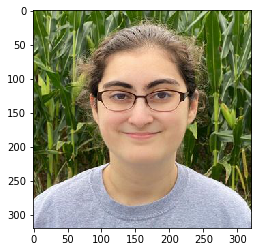

In [9]:
response = requests.get(profile_image, stream=True)
img=Image.open(response.raw)
plt.imshow(img)
plt.show()

👋Oh hey it's me 

Response that includes all of my playlists

In [10]:
playlists_endpoint_response = requests.get(PLAYLIST_LINK, headers=headers)

Listing out all non-private playlists

In [11]:
for playlist in playlists_endpoint_response.json()['items']:
    print(playlist['name'])

Sita's Post-2000 Songs
Sita's Pre-2000's Songs


Requesting playlist data

The Spotify API only grabs 100 songs at once from a playlist.  Since there are around 250 songs, all the data can be collected from three requests.

In [12]:
playlist_endpoint_response = requests.get(SPECIFIC_PLAYLIST_LINK, headers=headers)
playlist_endpoint_offset_response = requests.get(SPECIFIC_PLAYLIST_LINK_OFFSET, headers=headers)
playlist_endpoint_offset_response_200 = requests.get(SPECIFIC_PLAYLIST_LINK_OFFSET_200, headers=headers)

In [13]:
playlist_endpoint_response.json()['name']

"Sita's Pre-2000's Songs"

Checking data type of response

In [14]:
type(playlist_endpoint_response.json())

dict

Combining three playlist dictionaries by pushing into one array

In [15]:
playlist_all = []
playlist_all.append(playlist_endpoint_response.json()['tracks'])
playlist_all.append(playlist_endpoint_offset_response.json())
playlist_all.append(playlist_endpoint_offset_response_200.json())

### Album Release Dates

In [16]:
release_date=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        release_date.append(song['track']['album']['release_date'].split("-")[0])

In [17]:
release_df=pd.DataFrame(release_date,columns=['Release Dates'])
release_df

,Release Dates
0,1985
1,1985
2,1985
3,1987
4,1994
5,1994
6,1994
7,1982
8,1983
9,1988


In [18]:
unique_release_years=pd.DataFrame(release_df['Release Dates'].value_counts(), columns=['Release Dates']).sort_index()
unique_release_years

,Release Dates
1965,1
1969,1
1975,1
1976,1
1977,4
1978,3
1979,1
1980,9
1981,26
1982,35


In [19]:
unique_release_years.count()

Release Dates    40
dtype: int64

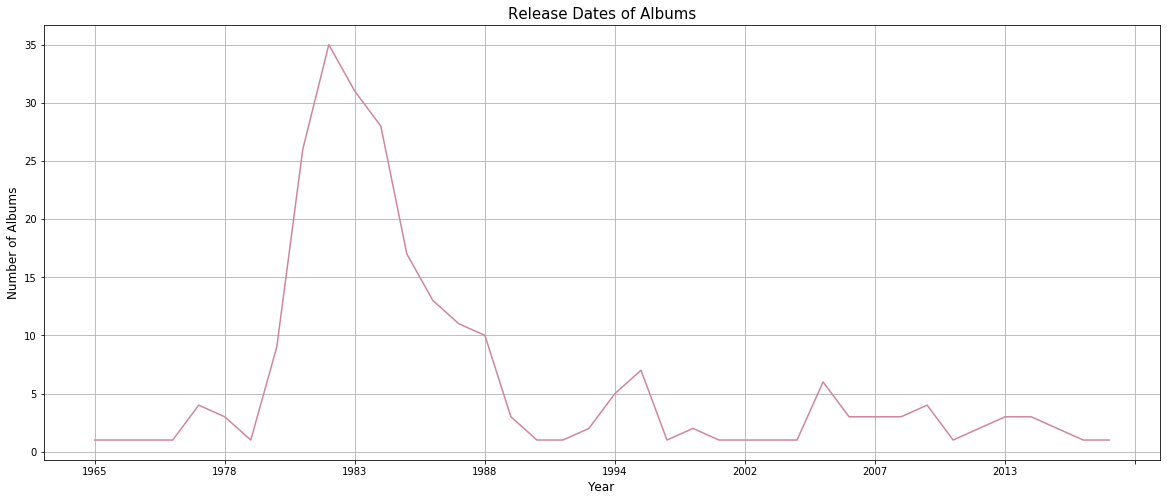

In [20]:
%matplotlib inline
unique_release_years.plot(kind='line', figsize=(20,8), color='#cf859f', legend=False)
plt.title("Release Dates of Albums", fontsize="15")
plt.xlabel("Year", fontsize="12")
plt.ylabel("Number of Albums", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

In [21]:
unique_release_years.loc[unique_release_years.index.values>'2000'].sum()

Release Dates    35
dtype: int64

The peak of the albums in this playlist seem to be from 1981-1984

The songs in this playlist I believe are mostly from before the 2000s.  However you see that there are around 35 that have release dates after the 2000s which is most likely because the song was remastered.

### Tracks in Album

In [22]:
tracks=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        tracks.append(song['track']['album']['total_tracks'])

In [23]:
track_df=pd.DataFrame(tracks,columns=['Number of Tracks'])

In [24]:
unique_track_df=pd.DataFrame(track_df['Number of Tracks'].value_counts(), columns=['Number of Tracks']).sort_index()
unique_track_df

,Number of Tracks
1,3
5,2
8,7
9,39
10,54
11,24
12,16
13,10
14,23
15,13


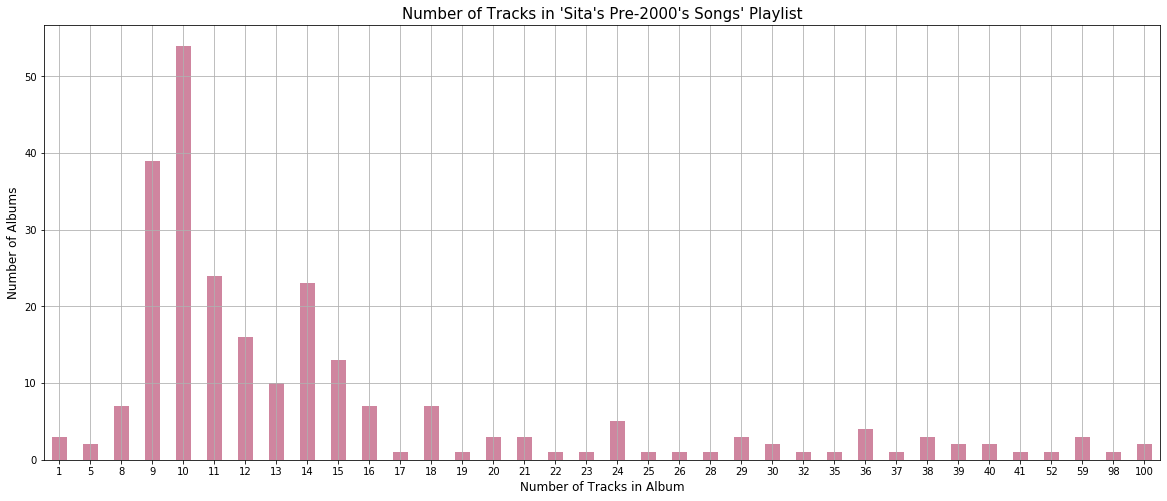

In [25]:
%matplotlib inline
unique_track_df.plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Number of Tracks in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Number of Tracks in Album", fontsize="12")
plt.ylabel("Number of Albums", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

The most number of albums seem to have tracks of 10, 9, 11 or 14.

### Date Song Added To Playlist

In [26]:
date_added=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        date_added.append(song['added_at'].split("-")[0])

In [27]:
added_df=pd.DataFrame(date_added,columns=['Date Added'])

In [28]:
unique_added_years=pd.DataFrame(added_df['Date Added'].value_counts(), columns=['Date Added']).sort_index()
unique_added_years

,Date Added
2016,73
2017,4
2018,20
2019,13
2020,140


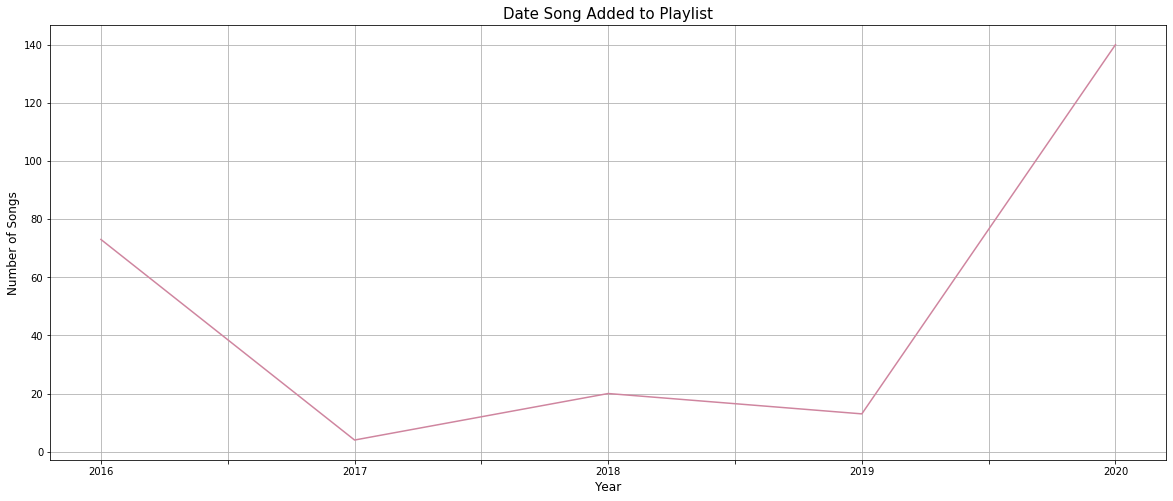

In [29]:
%matplotlib inline
unique_added_years.plot(kind='line', figsize=(20,8), color='#cf859f', legend=False)
plt.title("Date Song Added to Playlist", fontsize="15")
plt.xlabel("Year", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

Most of the songs were added to the playlist in 2020 and 2016.  There is a drop in between those years.  

### Popular Albums in Playlist

In [30]:
albums=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        albums.append(song['track']['album']['name'])

In [31]:
albums=pd.DataFrame(albums,columns=['Albums'])

In [32]:
unique_albums=pd.DataFrame(albums['Albums'].value_counts(), columns=['Albums'])
unique_albums

,Albums
Return To The Valley Of The Go-Go's,4
The Hits,3
The Essential Michael Jackson,3
Born In The U.S.A.,3
Escape,3
Vital Signs,3
Heartbeat City,3
Third Eye Blind,2
4 (Expanded),2
Super Hits,2


There are 208 unique albums

In [33]:
unique_albums['Albums'].count()

208

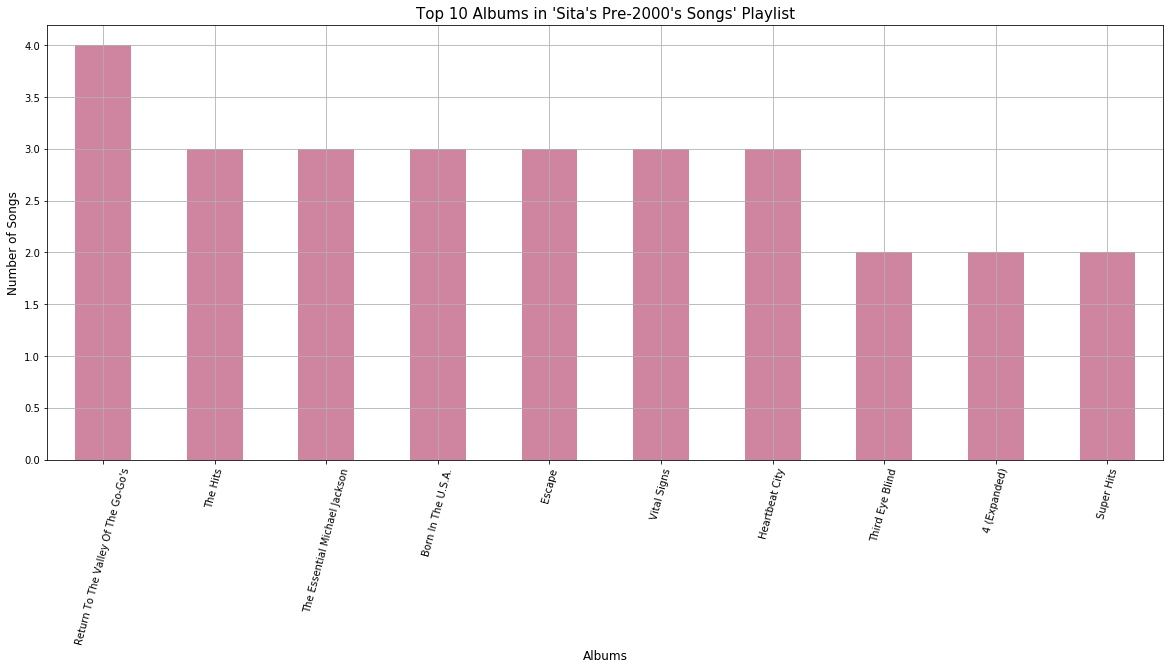

In [34]:
%matplotlib inline
unique_albums[0:10].plot(kind='bar', figsize=(20,8), width=0.5, color='#cf859f', legend=False)
plt.title("Top 10 Albums in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Albums", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=75)
plt.grid()   
plt.show()

The most songs are from the album Return To the Valley Of The Go-Go's

In [35]:
unique_albums.loc[unique_albums['Albums']<2].sum()

Albums    174
dtype: int64

In [36]:
unique_albums.loc[unique_albums['Albums']>2].sum()

Albums    22
dtype: int64

There are a large number of songs (173) in the playlist that are the only song within an album.  For the other songs in the playlist there are 22 that share an album with some other song.

### Songs in the Playlist

In [37]:
songs=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        songs.append(song['track']['name'])

In [38]:
songs=pd.DataFrame(songs,columns=['Songs'])
songs

,Songs
0,Take on Me
1,Shout
2,Everybody Wants To Rule The World
3,Nothing's Gonna Stop Us Now
4,Vacation
5,Head Over Heels
6,We Got The Beat - Single Mix
7,Heat Of The Moment
8,Don't Cry
9,Listen To Your Heart


Quick Duplicate Check

In [39]:
songs['Songs'].duplicated().sum()

0

Checking number of elements.  This counts the 0 index element as well

In [40]:
songs['Songs'].count()

250

### Artists in Playlist

In [41]:
artists=[]
for x in range(len(playlist_all)):
    for song in playlist_all[x]['items']:
        for artist in song['track']['artists']:
            artists.append(artist['name'])

In [42]:
artists_not_unique=pd.DataFrame(artists,columns=['Artists'])

In [43]:
unique_artists=pd.DataFrame(artists_not_unique['Artists'].value_counts(), columns=['Artists'])
unique_artists

,Artists
Michael Jackson,7
Eddie Money,7
Journey,7
Survivor,6
Daryl Hall & John Oates,6
REO Speedwagon,5
The Cars,5
Rick Springfield,5
Huey Lewis & The News,5
Men At Work,4


There are 152 unique artists in the playlist

In [44]:
unique_artists['Artists'].count()

152

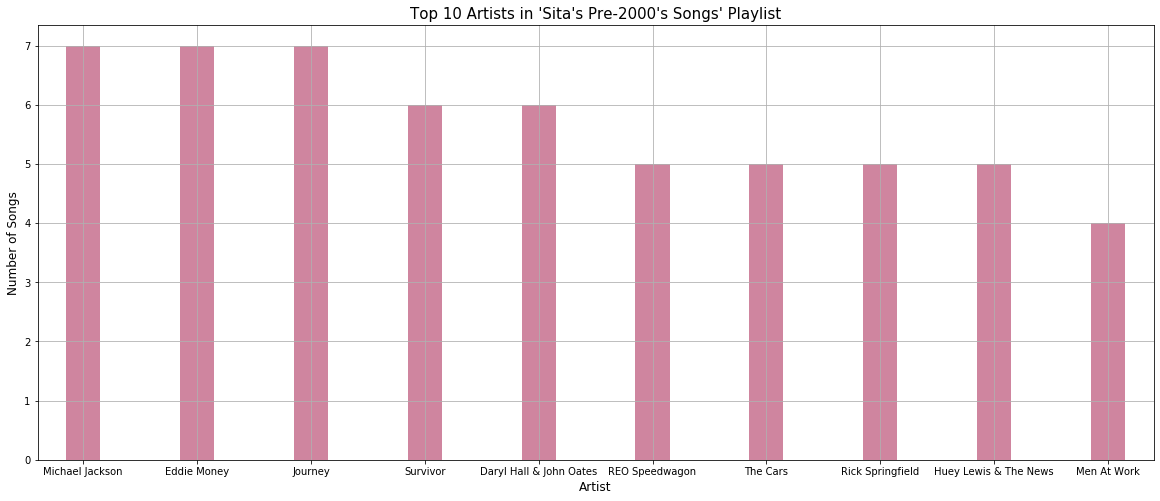

In [45]:
%matplotlib inline
unique_artists[0:10].plot(kind='bar', figsize=(20,8), width=0.3, color='#cf859f', legend=False)
plt.title("Top 10 Artists in 'Sita's Pre-2000's Songs' Playlist", fontsize="15")
plt.xlabel("Artist", fontsize="12")
plt.ylabel("Number of Songs", fontsize="12")
plt.xticks(rotation=0)
plt.grid()   
plt.show()

The top artists in my playlist are Journey, Eddie Money, Michael Jackson, Daryl Hall & John Oates, and Survivor. 

### Playlist Cover Art

In [46]:
image_response = requests.get(PLAYLIST_IMAGE_LINK, headers=headers)
image=image_response.json()[0]['url']

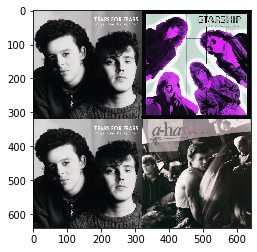

In [47]:
response = requests.get(image, stream=True)
img=Image.open(response.raw)
plt.imshow(img)
plt.show()

### References 

Docs
* https://developer.spotify.com/console/playlists/

Playlist
* https://open.spotify.com/playlist/3b6hKzYzFpCKxipAz3pAvr